In [109]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
import time

In [110]:
# Load the insurance Dataset

df = pd.read_csv("/Users/radhamahesh/Desktop/AI-ML Materials/vehicle.csv")


df.head()


df.describe(include="all")

#shape of the data
df.shape

#datatype of each fields in the dataset
df.info()

#missing values check in the dataset
df.isna().apply(pd.value_counts)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          842             840               845   
True                             4               6                 1   

       skewness_about.2  hollows_ratio  class  
False               845          846.0  846.0  
True                  1            NaN    NaN

In [111]:
print('Shape of the data: \nRows:{}\nColumns:{}'.format(df.shape[0],df.shape[1]))

Shape of the data: 
Rows:846
Columns:19


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [113]:
# checking for null values
'''for col in df.columns:
    print("{}:\t{}".format(col,sum(df[col].isnull())))'''
print('Null values in columns :\n{}'.format(df.isna().sum()))

Null values in columns :
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [114]:
# check for any duplicate values 
print('Duplicate values in columns : \n{}'.format((df[df.duplicated()]).count()))

Duplicate values in columns : 
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


In [115]:
df.describe().transpose()


count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [116]:
#Total number of rows with missing values.
df.isnull().sum().sum()

41

In [117]:
#check for missing values
Temp = pd.DataFrame(df.isnull().sum())
Temp.columns = ['Sum']
print('Number of variables with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])))
Var_with_missingValues=Temp[Temp['Sum']>0].index.tolist()
print('The variables with missing values:', Var_with_missingValues)

Number of variables with missing values: 14
The variables with missing values: ['circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2']


In [118]:
df.circularity.describe()

count    841.000000
mean      44.828775
std        6.152172
min       33.000000
25%       40.000000
50%       44.000000
75%       49.000000
max       59.000000
Name: circularity, dtype: float64

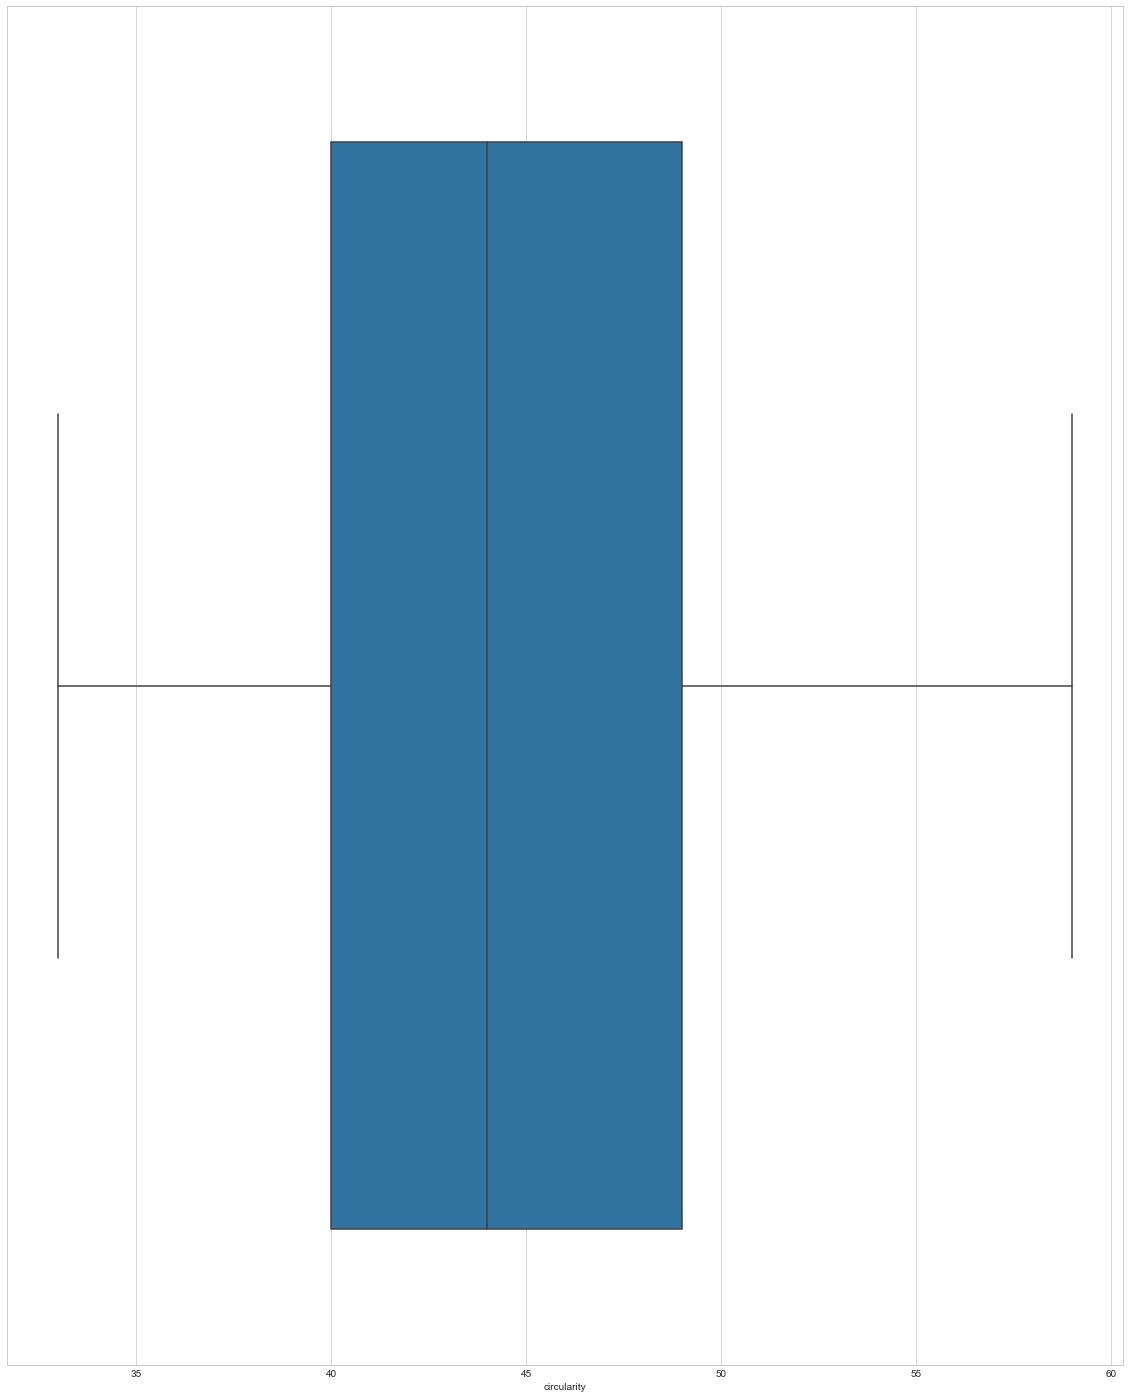

In [119]:
sns.boxplot(df.circularity)
#no outliers and looks like a normal distribution and hence replacing the missing values with mean will be fair estimation

In [120]:
df.circularity.fillna(df.circularity.mean(), inplace=True)

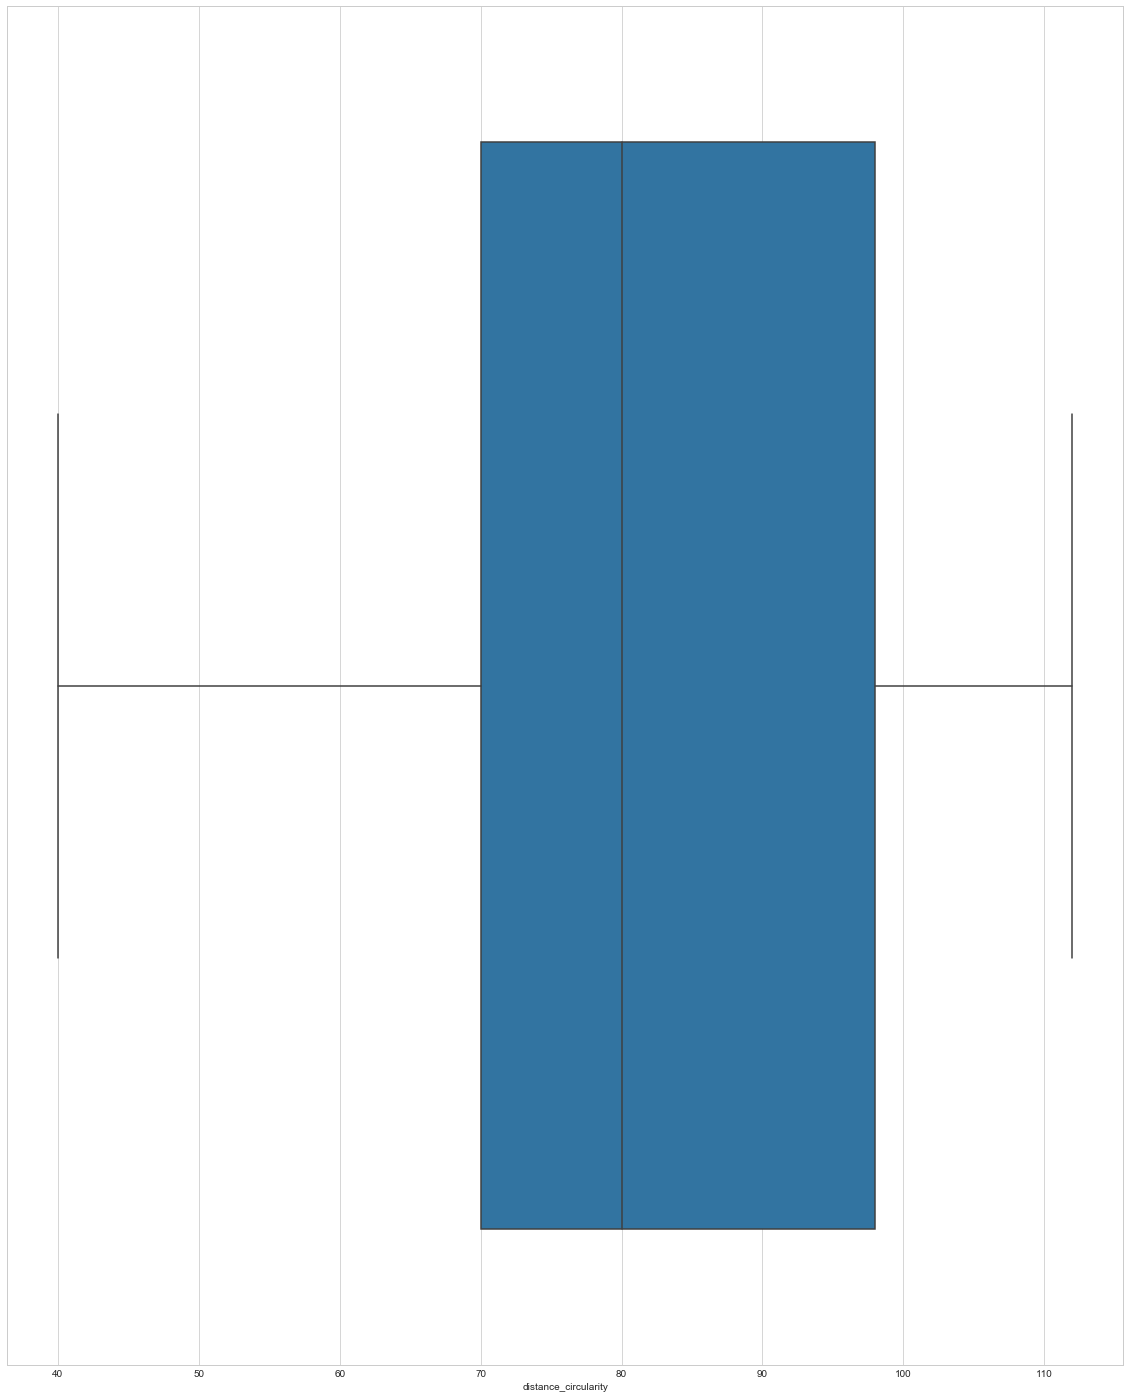

In [121]:
sns.boxplot(df.distance_circularity)
#same observation as above.

In [122]:
# creating a stagging dataframe for our analysis
df_stg = df.copy()
print('shape of the data before dropping missing values : {}'.format(df_stg.shape))

shape of the data before dropping missing values : (846, 19)


In [123]:
#Replacing all missing values with the mean of the respective column
df.fillna(df.mean(), inplace=True)

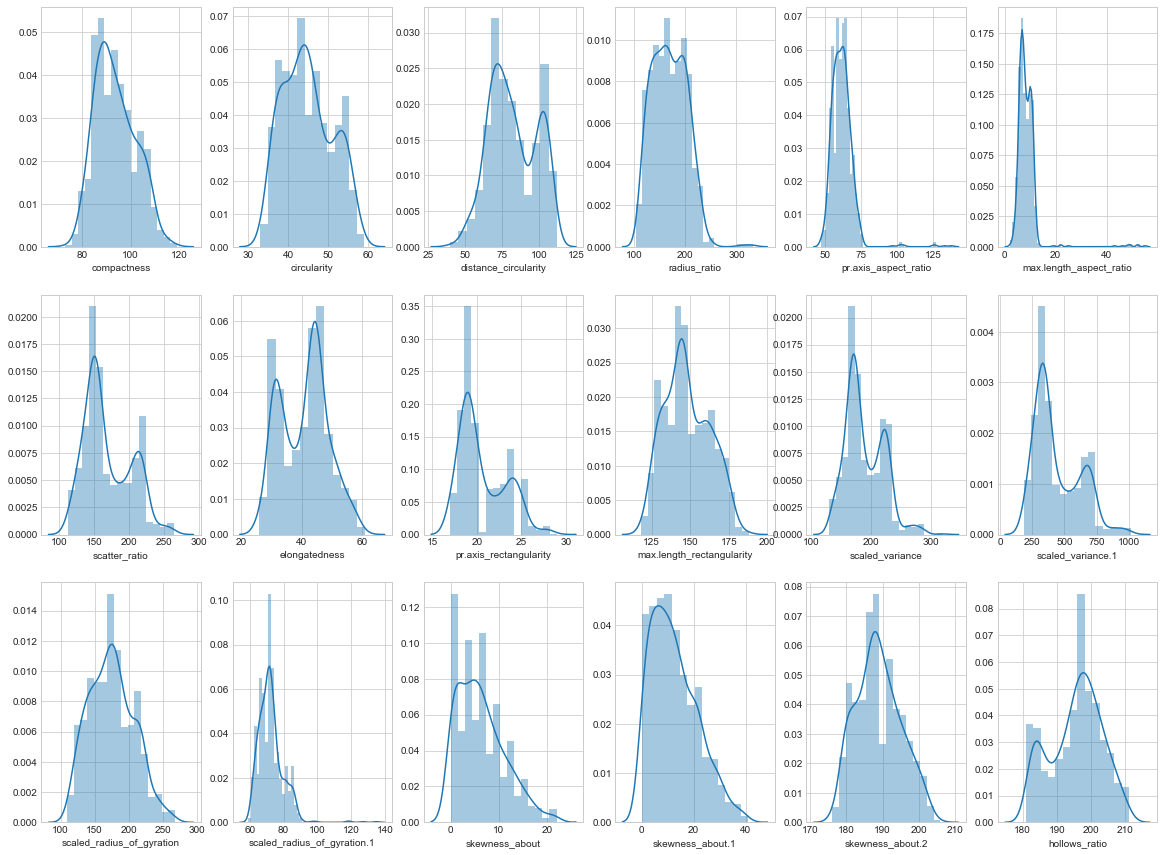

In [124]:
#Univariate analsis

var=np.arange(1,len(df.columns))
var
from IPython.core.pylabtools import figsize
figsize(20, 15)
for i in var:
    plt.subplot(3,6,i)
    sns.distplot(df.iloc[:,(i-1)])

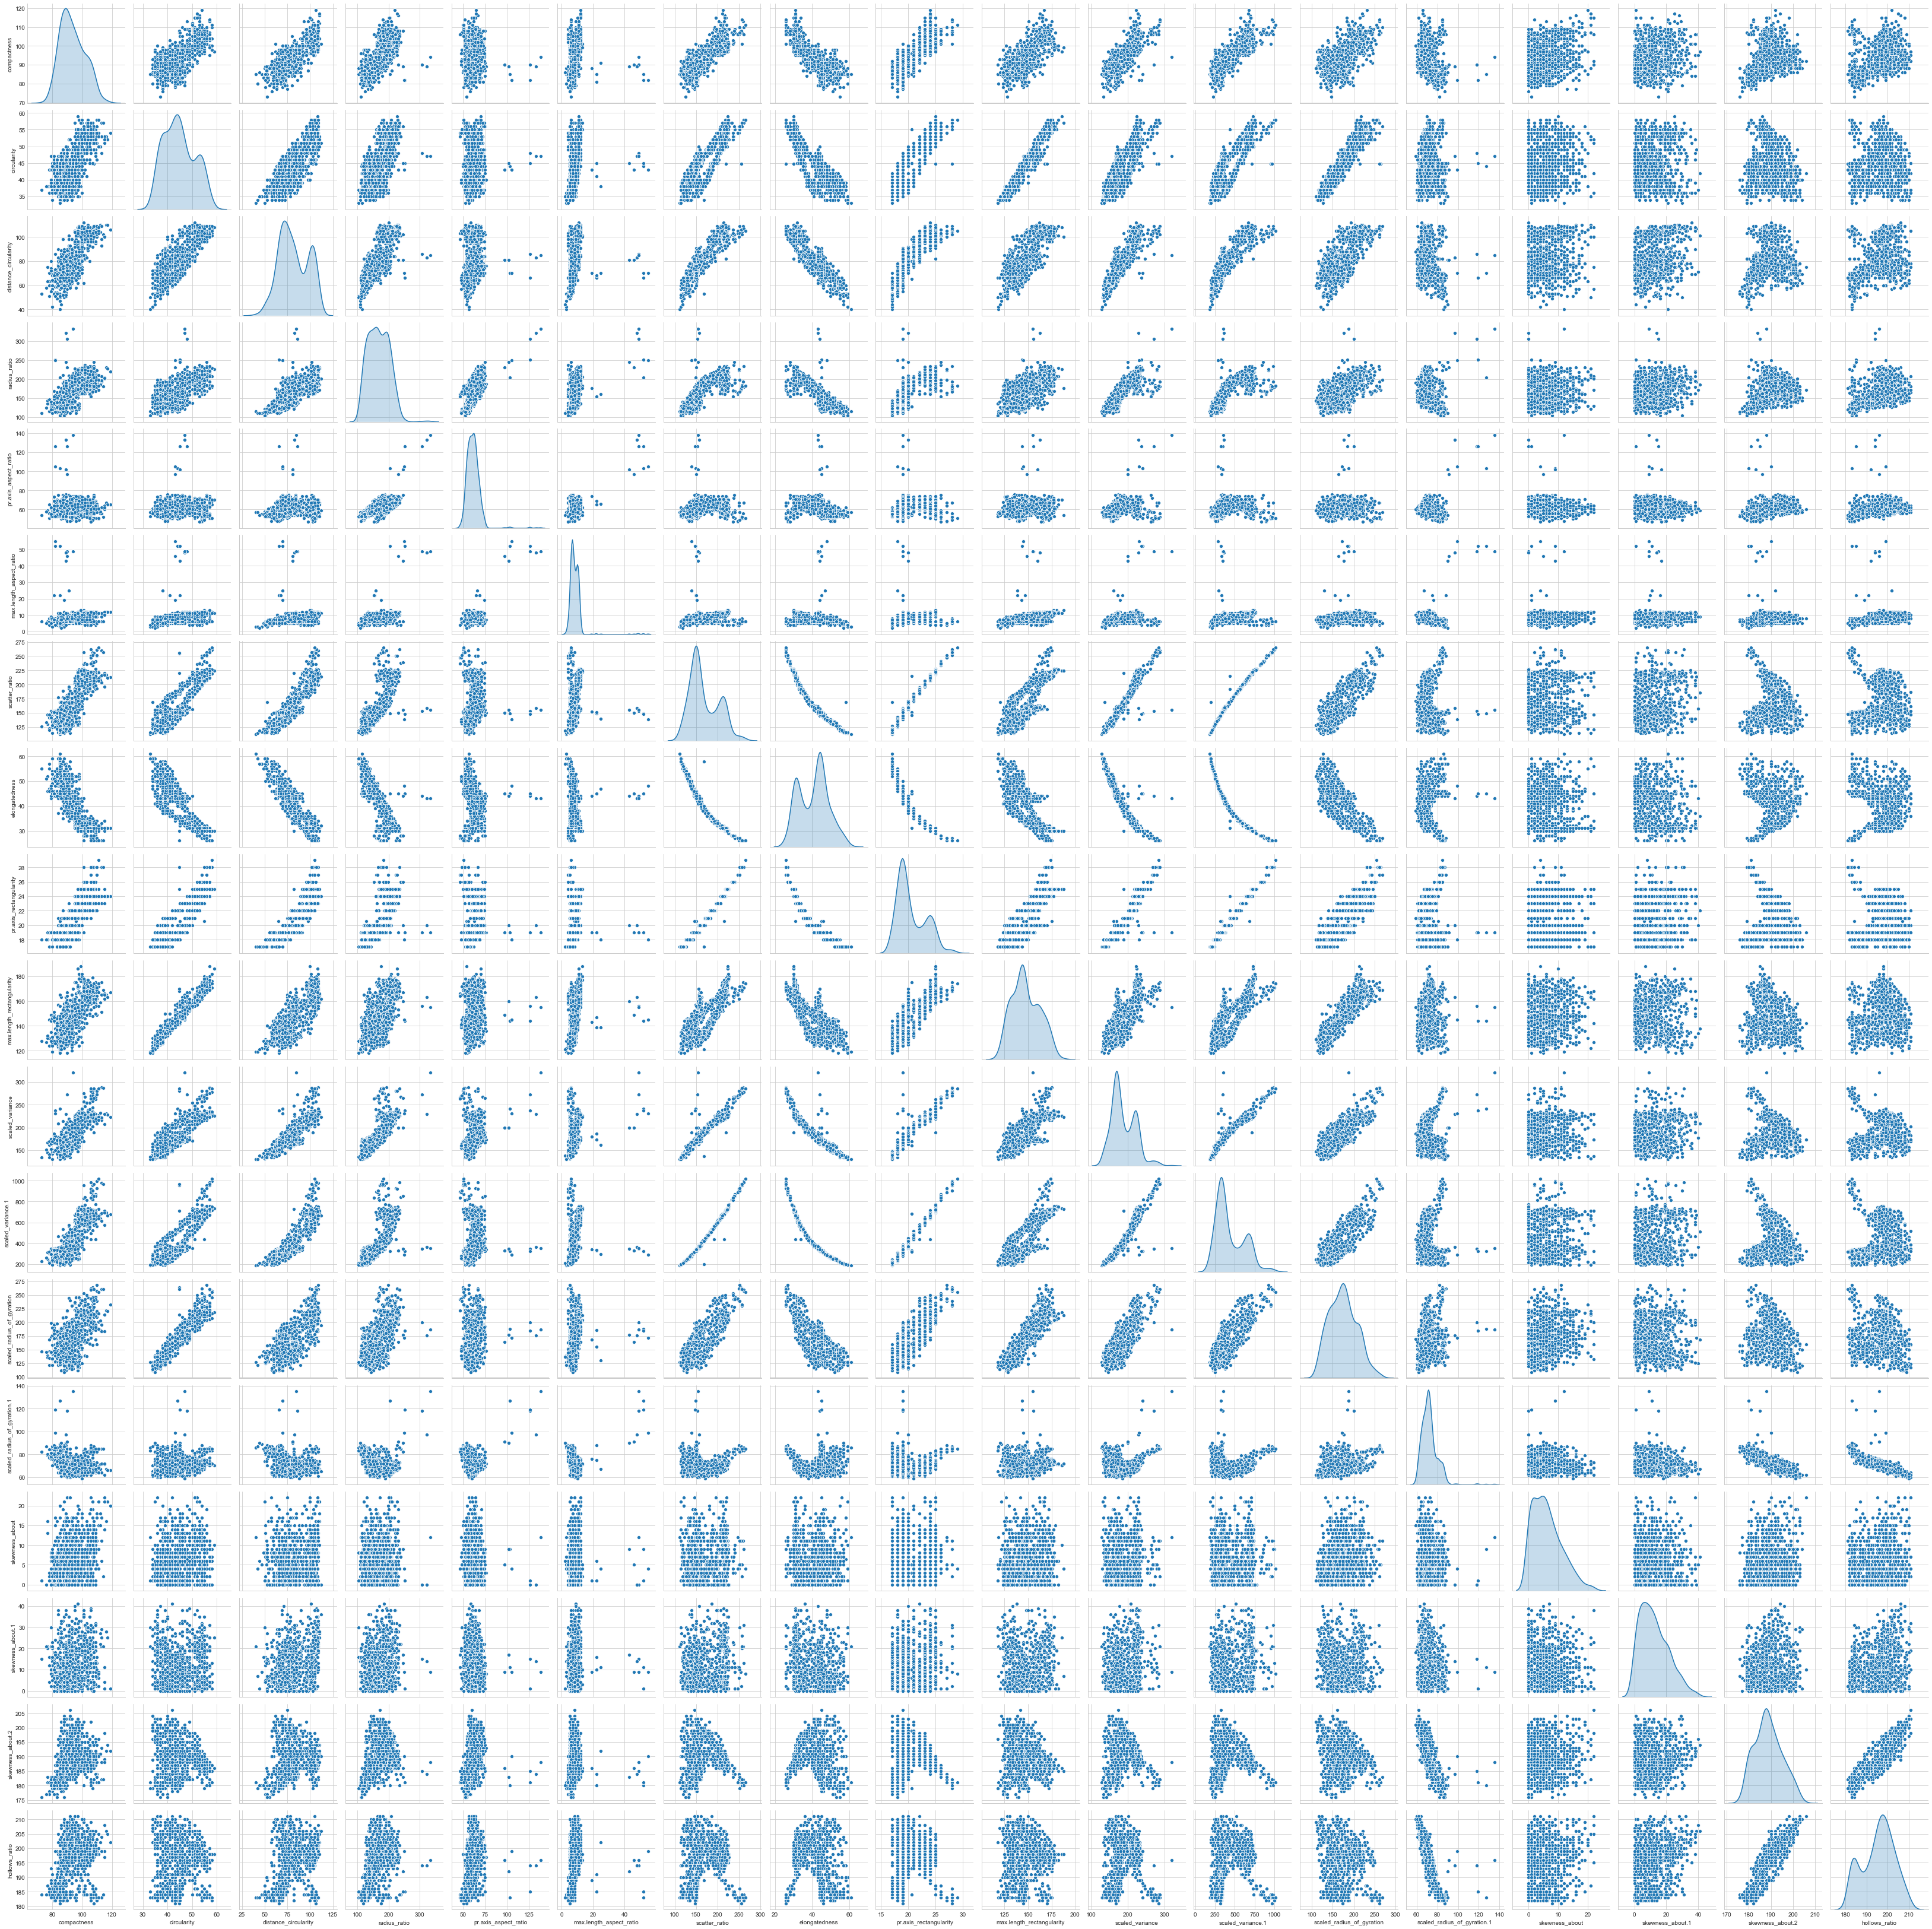

In [125]:
sns.pairplot(df,diag_kind='kde')

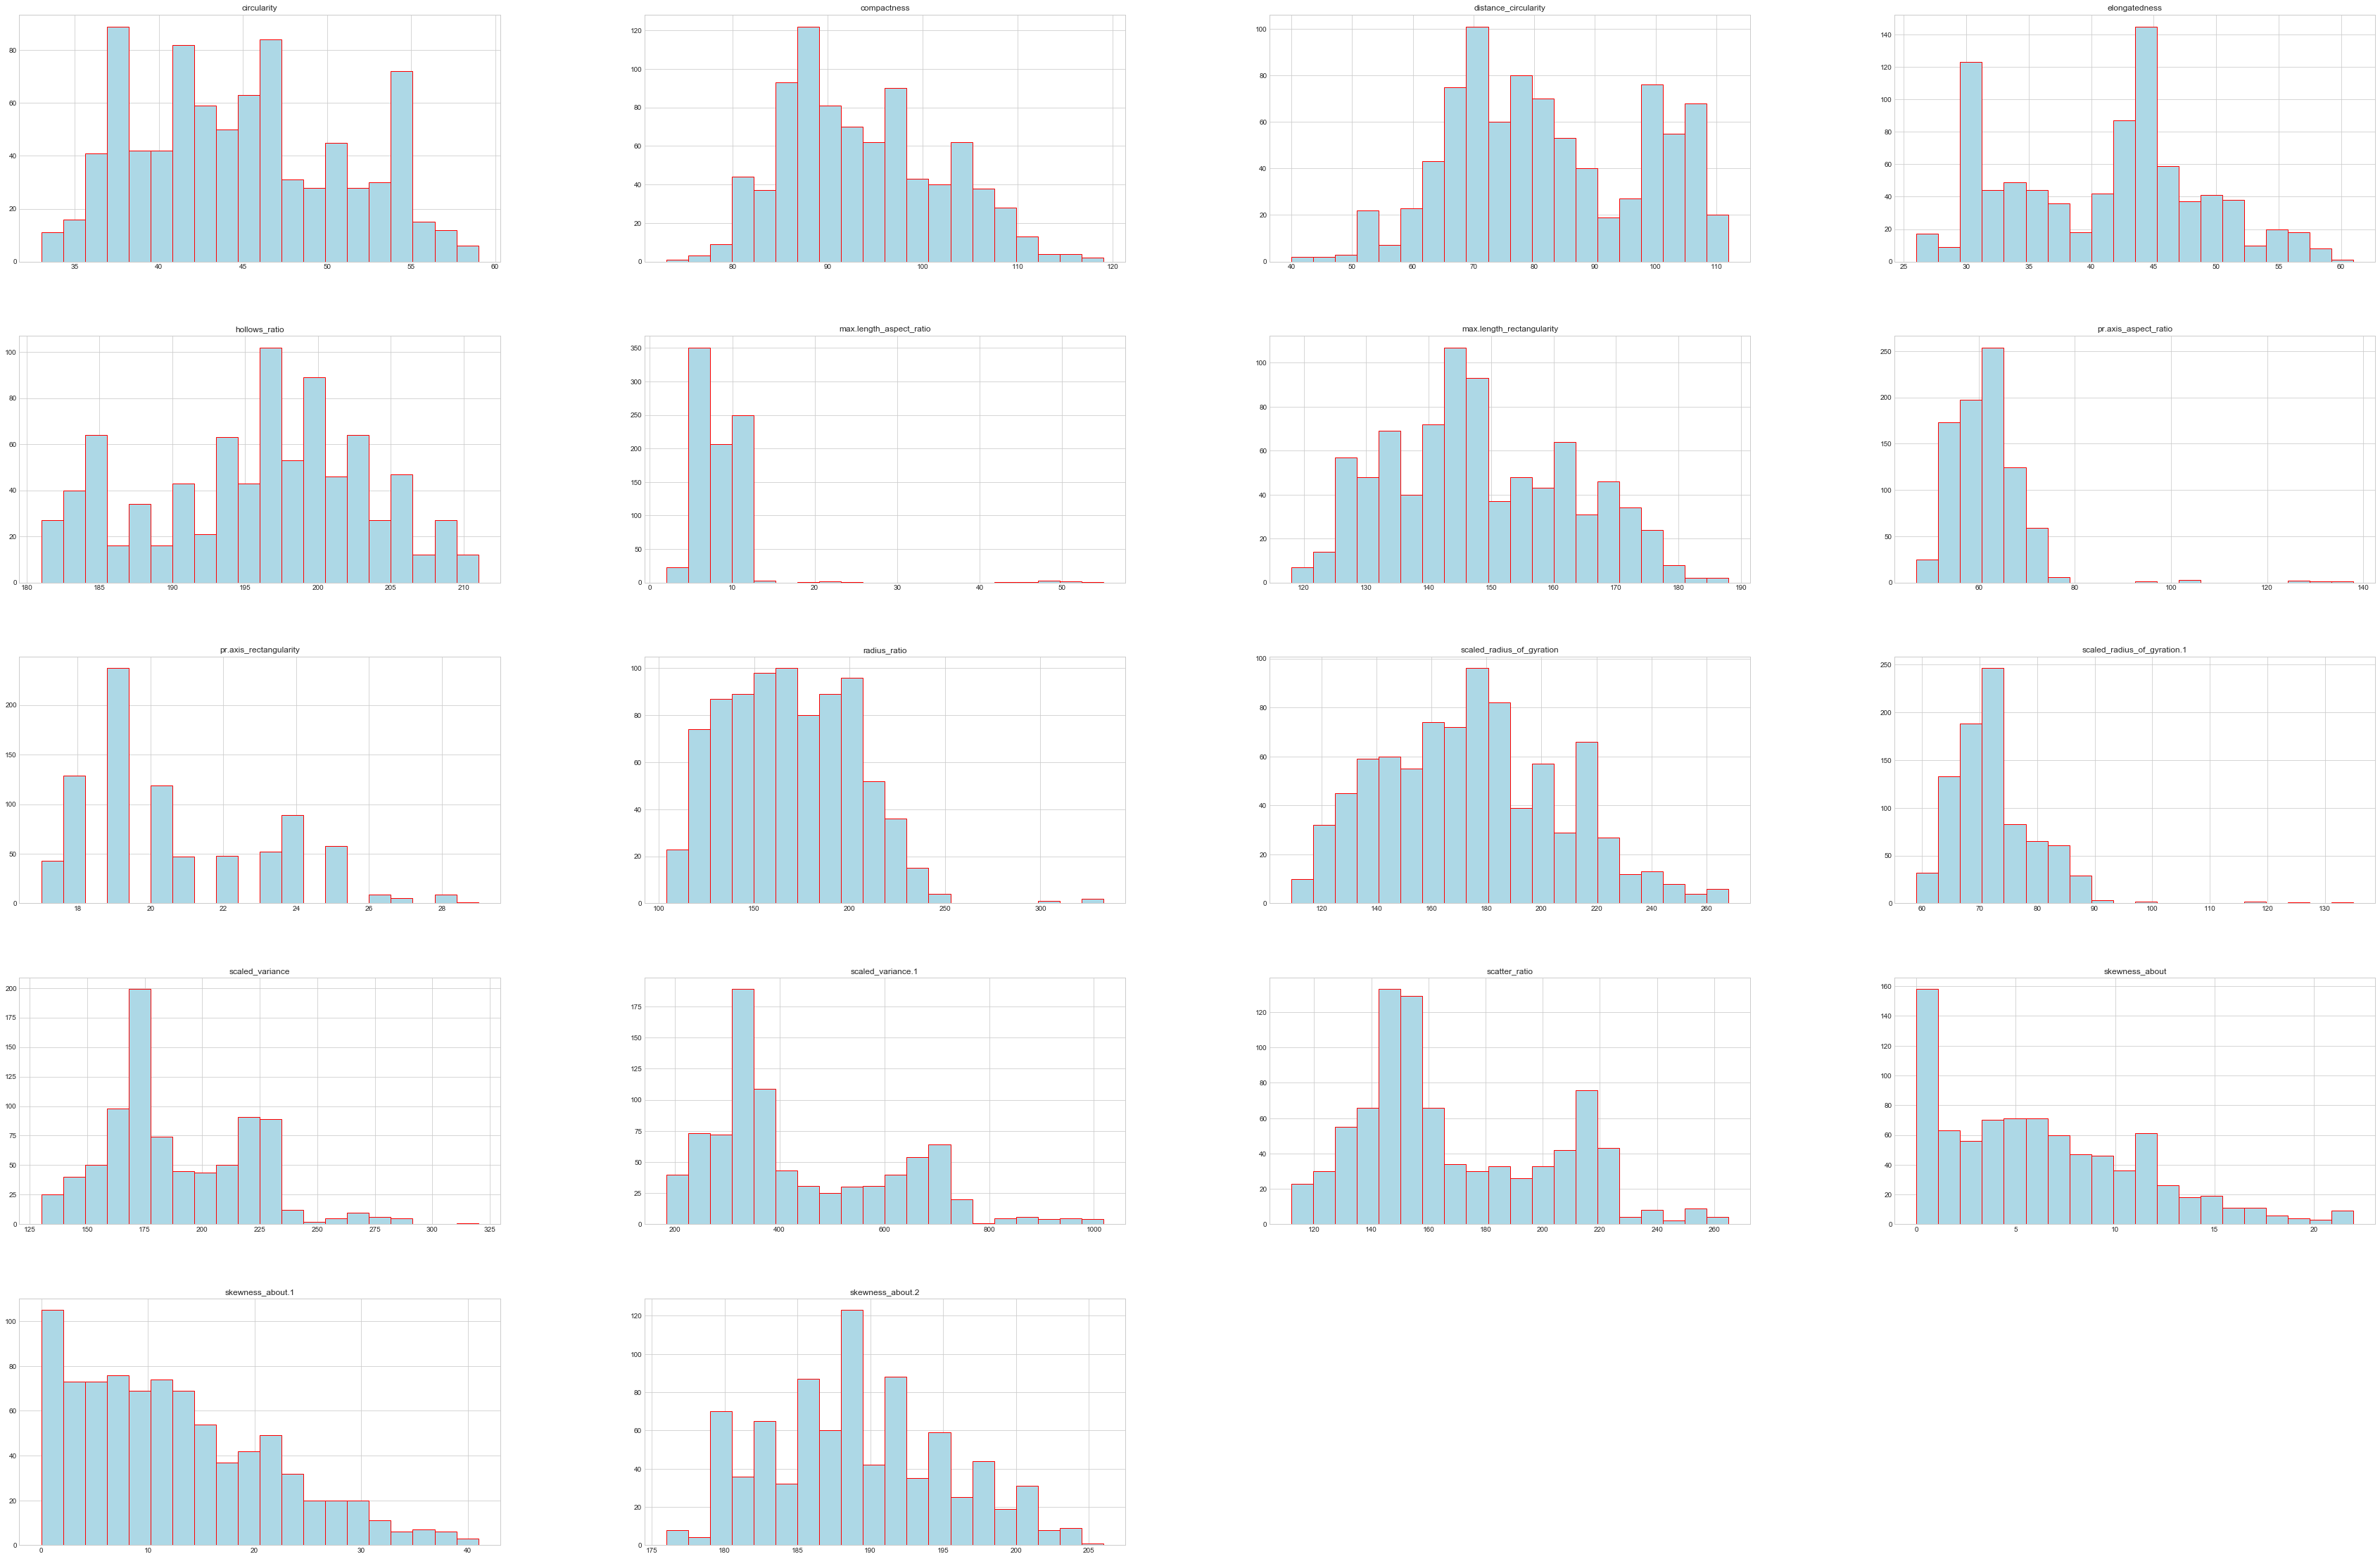

In [126]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

In [127]:
#Quick Observation :

#Most of the data attributes seems to be normally distributed
#scaled valriance 1 and skewness about 1 and 2, scatter_ratio, seems to be right skwed .
#pr.axis_rectangularity seems to be having outliers as there are some gaps found in the bar plot.

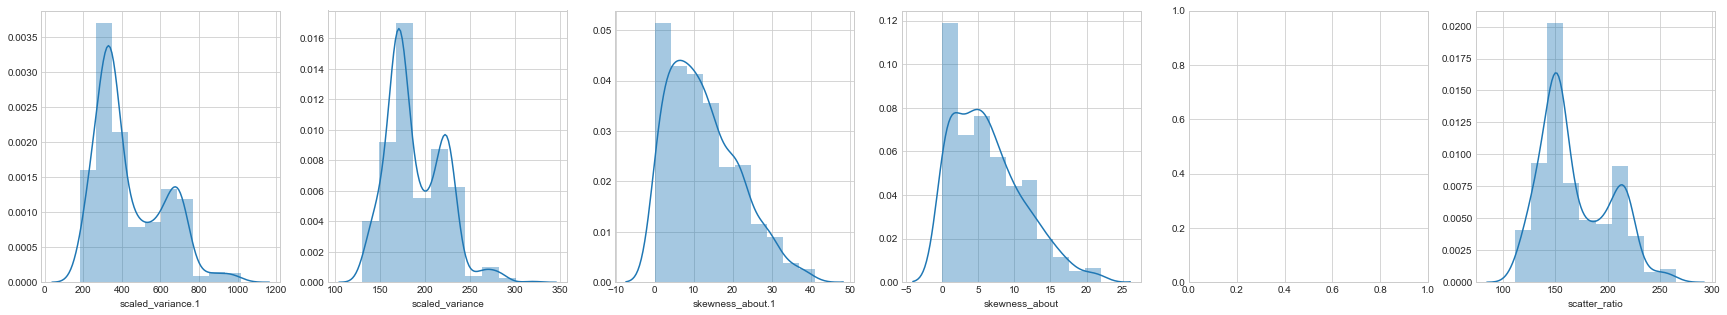

In [128]:
#Let us use seaborn distplot to analyze the distribution of our columns and see the skewness in attributes
f, ax = plt.subplots(1, 6, figsize=(30,5))
vis1 = sns.distplot(df["scaled_variance.1"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["scaled_variance"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["skewness_about.1"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["skewness_about"],bins=10, ax=ax[3])
vis6 = sns.distplot(df["scatter_ratio"],bins=10, ax=ax[5])

In [129]:
skewValue = df.skew()
print("skewValue of dataframe attributes: ", skewValue)

skewValue of dataframe attributes:  compactness                    0.381271
circularity                    0.262584
distance_circularity           0.106837
radius_ratio                   0.396381
pr.axis_aspect_ratio           3.834882
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607629
elongatedness                  0.047875
pr.axis_rectangularity         0.772254
max.length_rectangularity      0.256359
scaled_variance                0.652753
scaled_variance.1              0.843027
scaled_radius_of_gyration      0.279647
scaled_radius_of_gyration.1    2.088422
skewness_about                 0.779277
skewness_about.1               0.688423
skewness_about.2               0.249468
hollows_ratio                 -0.226341
dtype: float64


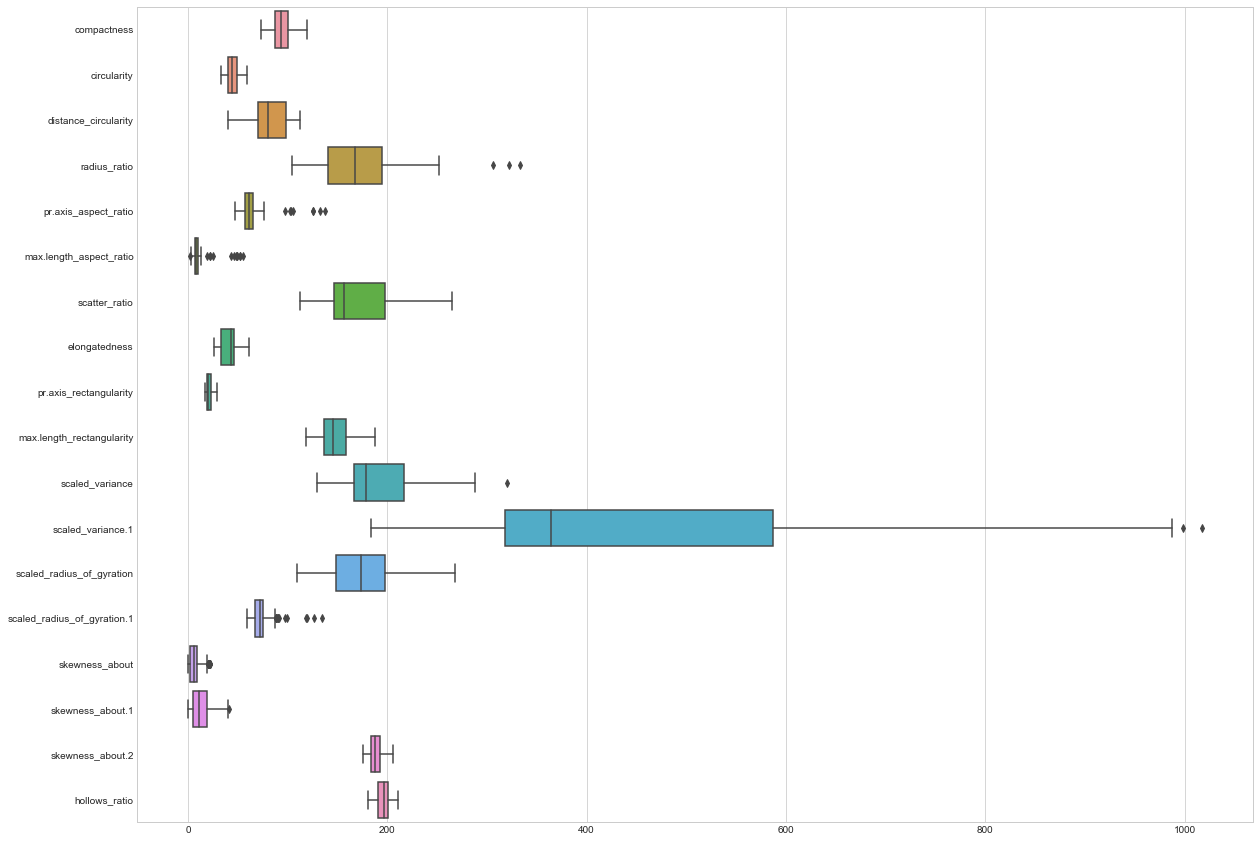

In [130]:
#Summary View of all attribute , The we will look into all the boxplot individually to trace out outliers

ax = sns.boxplot(data=df, orient="h")

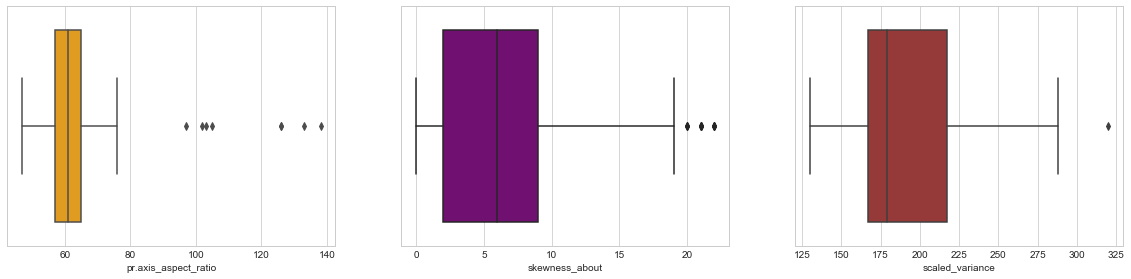

In [131]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df['pr.axis_aspect_ratio'], color='orange')

plt.subplot(3,3,2)
sns.boxplot(x= df.skewness_about, color='purple')

plt.subplot(3,3,3)
sns.boxplot(x= df.scaled_variance, color='brown')

plt.show()

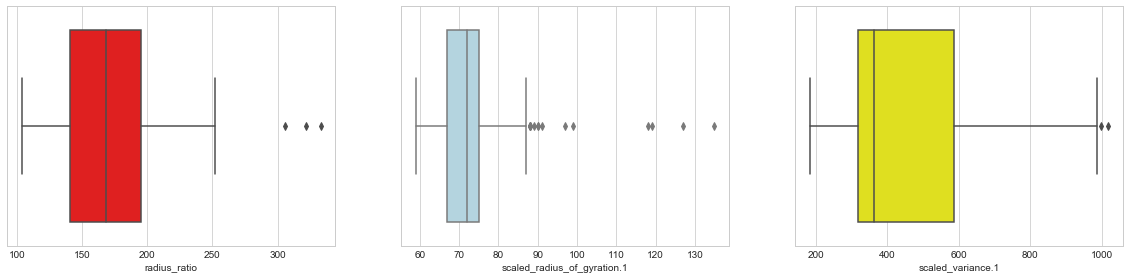

In [132]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df['radius_ratio'], color='red')

plt.subplot(3,3,2)
sns.boxplot(x= df['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= df['scaled_variance.1'], color='yellow')

plt.show()

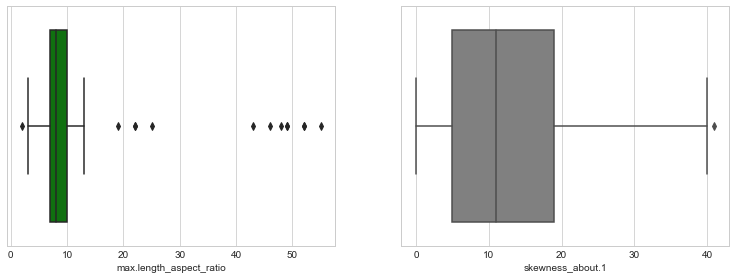

In [133]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df['max.length_aspect_ratio'], color='green')

plt.subplot(3,3,2)
sns.boxplot(x= df['skewness_about.1'], color='grey')


plt.show()

In [134]:
#Observation on boxplots:
#pr.axis_aspect_ratio,max_length_aspect_ratio,
#scaled_radius_of_gyration.1, scaled_variance.1, radius_ratio,scaled_variance.1 are some of the attributes with outliers


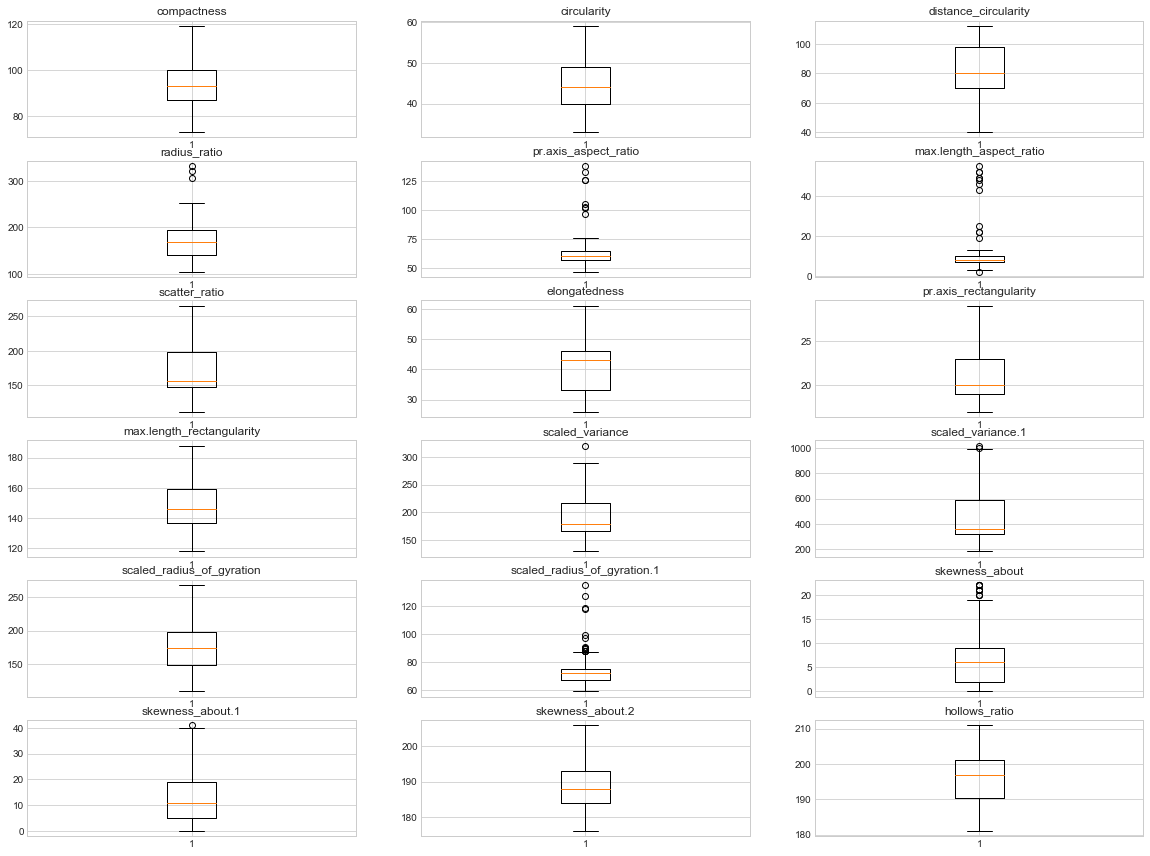

In [135]:
# Check for outliers
figsize(20, 15)
for i in var:
    plt.subplot(6,3,i)
    plt.boxplot(df.iloc[:,(i-1)])
    plt.title(df.columns[i-1])

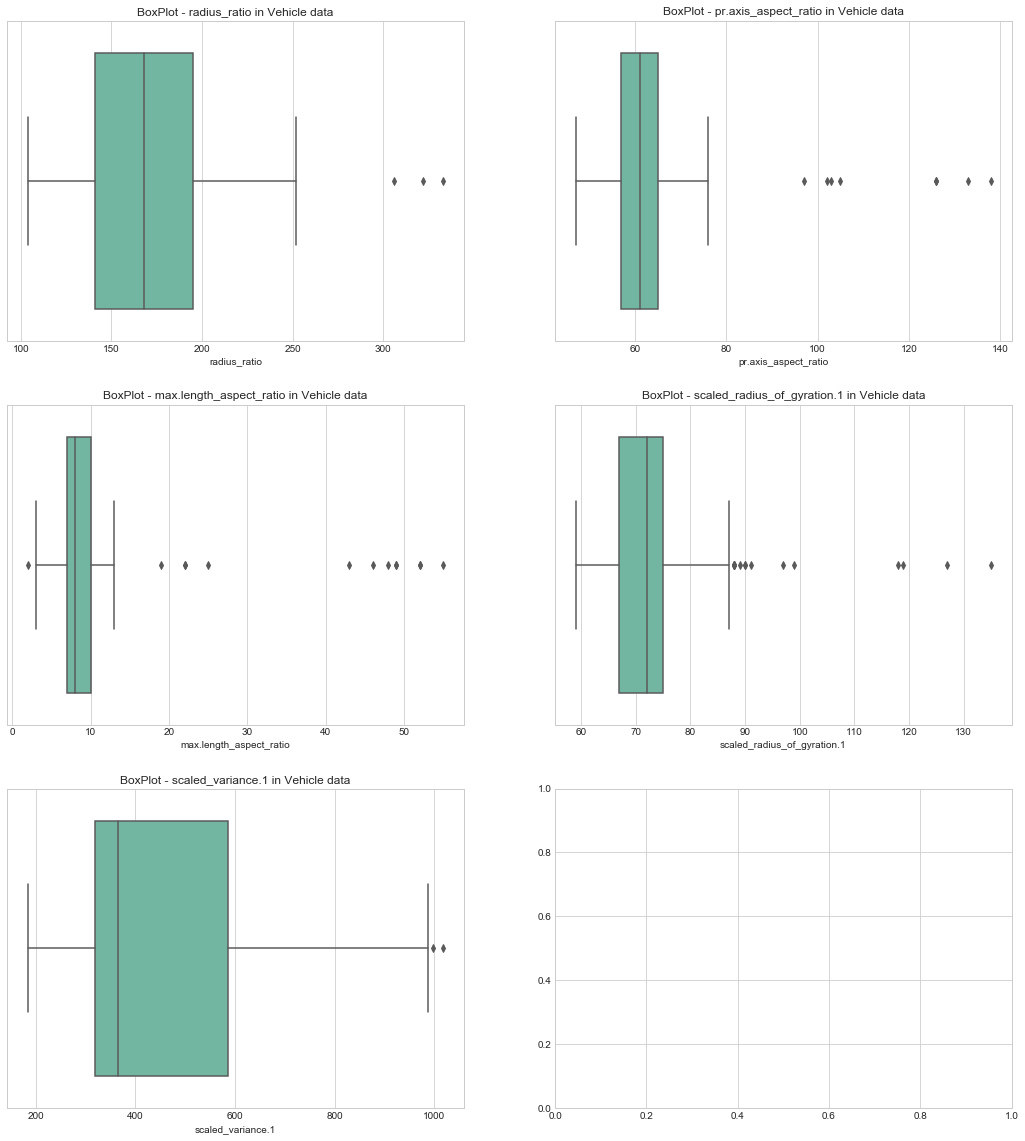

In [136]:
# function to plot outliers

def outlier_detection(_column_name,_df):
    fix,ax = plt.subplots(ncols = 2, nrows= 3,figsize=(18,20))
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    
    for _col,_ax in zip(_column_name,ax.flat):
        _ax = sns.boxplot(y=_col,data=_df,ax=_ax,orient='h',palette="Set2")
        _ax.set(xlabel=_col)
        _ax.set_title("BoxPlot - {} in Vehicle data".format(_col))


column_name = ["radius_ratio","pr.axis_aspect_ratio","max.length_aspect_ratio",
               "scaled_radius_of_gyration.1","scaled_variance.1"]
outlier_detection(column_name,df)

In [137]:
print('Number of Outliers in radius_ratio columns : {}'.format(df['radius_ratio'][df['radius_ratio']>250].count()))
print('Number of Outliers in axis_aspect_ratio columns : {}'.format(df['pr.axis_aspect_ratio'][df['pr.axis_aspect_ratio']>90].count()))
print('Number of Outliers in max.length_aspect_ratio columns : {}'.format(df['max.length_aspect_ratio'][df['max.length_aspect_ratio']>15].count()))
print('Number of Outliers in scaled_radius_of_gyration.1 columns : {}'.format(df['scaled_radius_of_gyration.1'][df['scaled_radius_of_gyration.1']>87].count()))
print('Number of Outliers in scaled_variance.1 columns : {}'.format(df['scaled_variance.1'][df['scaled_variance.1']>970].count()))


Number of Outliers in radius_ratio columns : 4
Number of Outliers in axis_aspect_ratio columns : 8
Number of Outliers in max.length_aspect_ratio columns : 12
Number of Outliers in scaled_radius_of_gyration.1 columns : 15
Number of Outliers in scaled_variance.1 columns : 4


In [138]:
# convert the class column 
df_vehicle = df.copy()
df_vehicle['class'] = df_vehicle['class'].astype('category')
df_vehicle["class"] = df_vehicle["class"].cat.codes
df_vehicle["class"] = df_vehicle["class"].astype("int64")

# 0 : bus
# 1 : car
# 2: van
df_vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

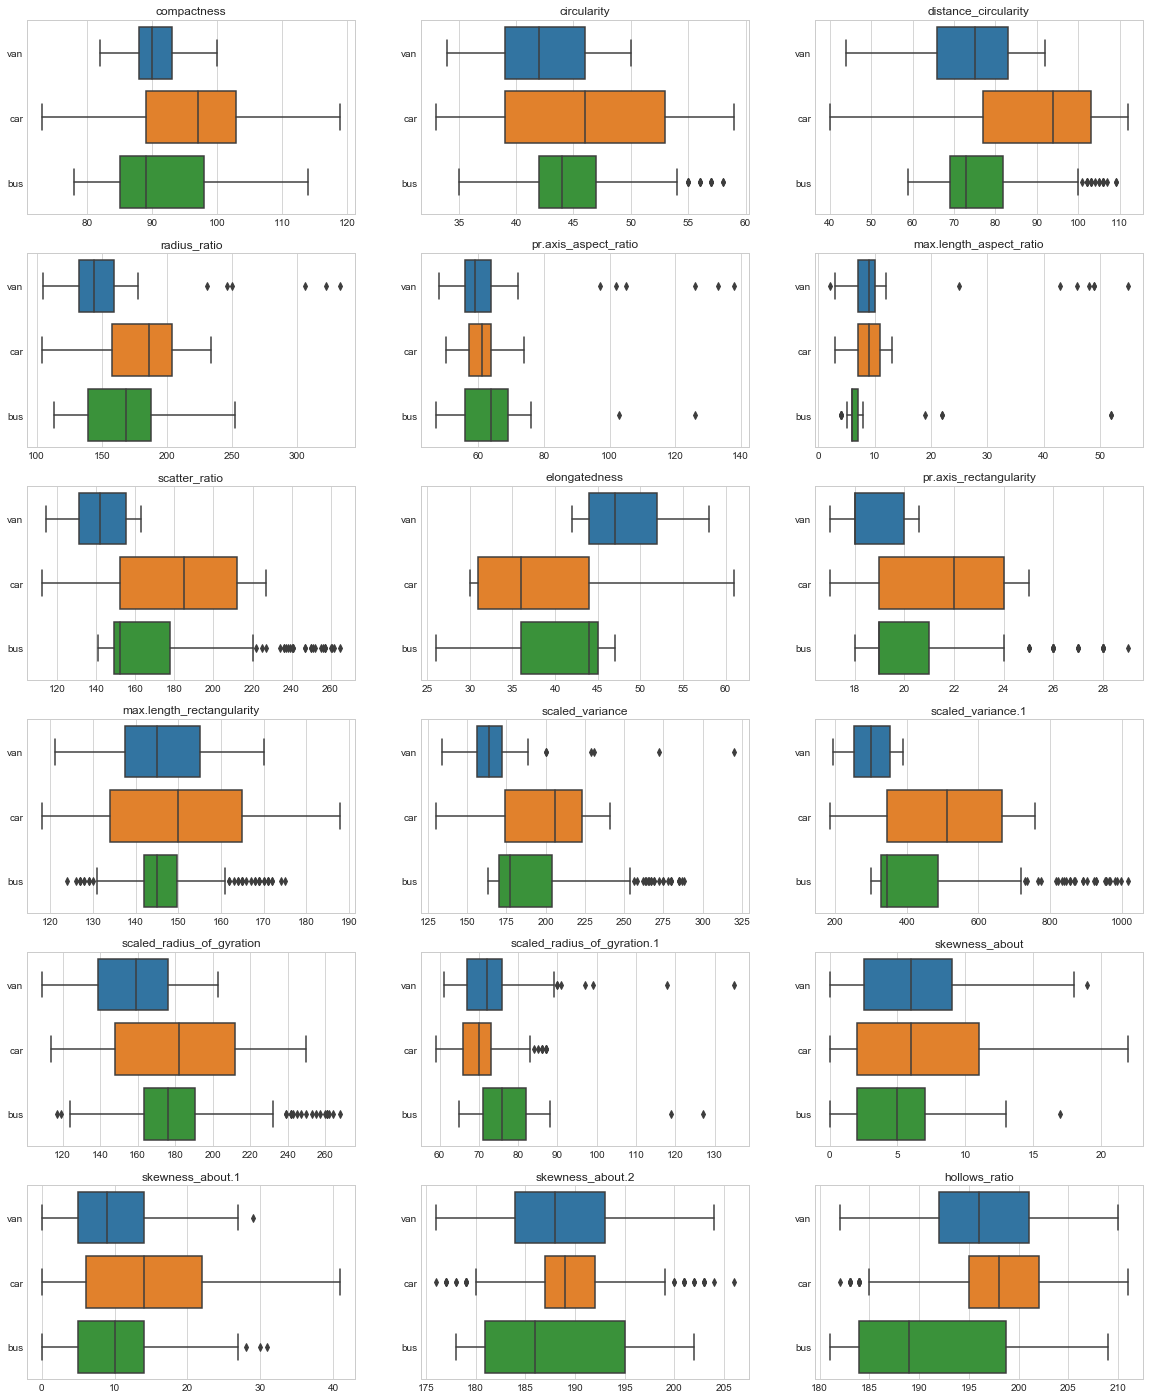

In [139]:
var=np.arange(1,len(df.columns))
from IPython.core.pylabtools import figsize
figsize(20, 25)
for i in var:
    plt.subplot(6,3,i)
    sns.boxplot(df.iloc[:,(i-1)], df['class'])
    plt.ylabel('')
    plt.xlabel('')
    plt.title(df.columns[i-1])

In [140]:
# remove the outliers

df_vehicle = df_vehicle[df_vehicle['radius_ratio']<250]
df_vehicle = df_vehicle[df_vehicle['pr.axis_aspect_ratio']<90]
df_vehicle = df_vehicle[df_vehicle['max.length_aspect_ratio']<15]
df_vehicle = df_vehicle[df_vehicle['scaled_radius_of_gyration.1']<87]
df_vehicle = df_vehicle[df_vehicle['scaled_variance.1']<970]

print('Number of Outliers in radius_ratio columns : {}'.format(df_vehicle['radius_ratio'][df_vehicle['radius_ratio']>250].count()))
print('Number of Outliers in axis_aspect_ratio columns : {}'.format(df_vehicle['pr.axis_aspect_ratio'][df_vehicle['pr.axis_aspect_ratio']>90].count()))
print('Number of Outliers in max.length_aspect_ratio columns : {}'.format(df_vehicle['max.length_aspect_ratio'][df_vehicle['max.length_aspect_ratio']>15].count()))
print('Number of Outliers in scaled_radius_of_gyration.1 columns : {}'.format(df_vehicle['scaled_radius_of_gyration.1'][df_vehicle['scaled_radius_of_gyration.1']>87].count()))
print('Number of Outliers in scaled_variance.1 columns : {}'.format(df_vehicle['scaled_variance.1'][df_vehicle['scaled_variance.1']>970].count()))

Number of Outliers in radius_ratio columns : 0
Number of Outliers in axis_aspect_ratio columns : 0
Number of Outliers in max.length_aspect_ratio columns : 0
Number of Outliers in scaled_radius_of_gyration.1 columns : 0
Number of Outliers in scaled_variance.1 columns : 0


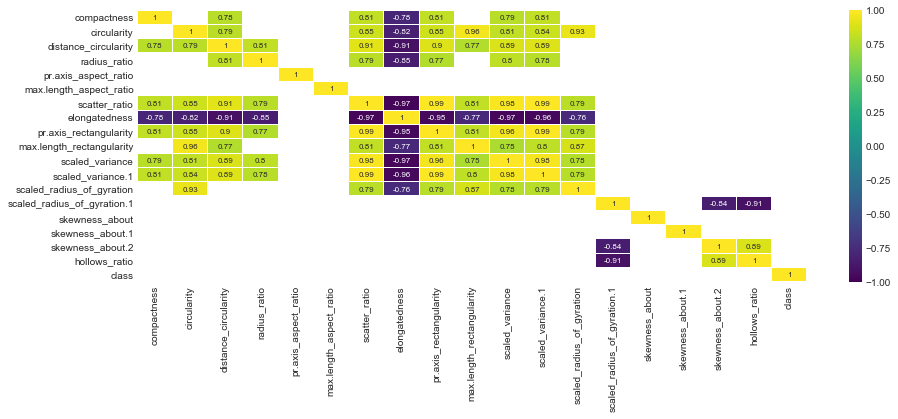

In [141]:
corr=df_vehicle.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr[(corr >= 0.75) | (corr <= -0.75)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8})

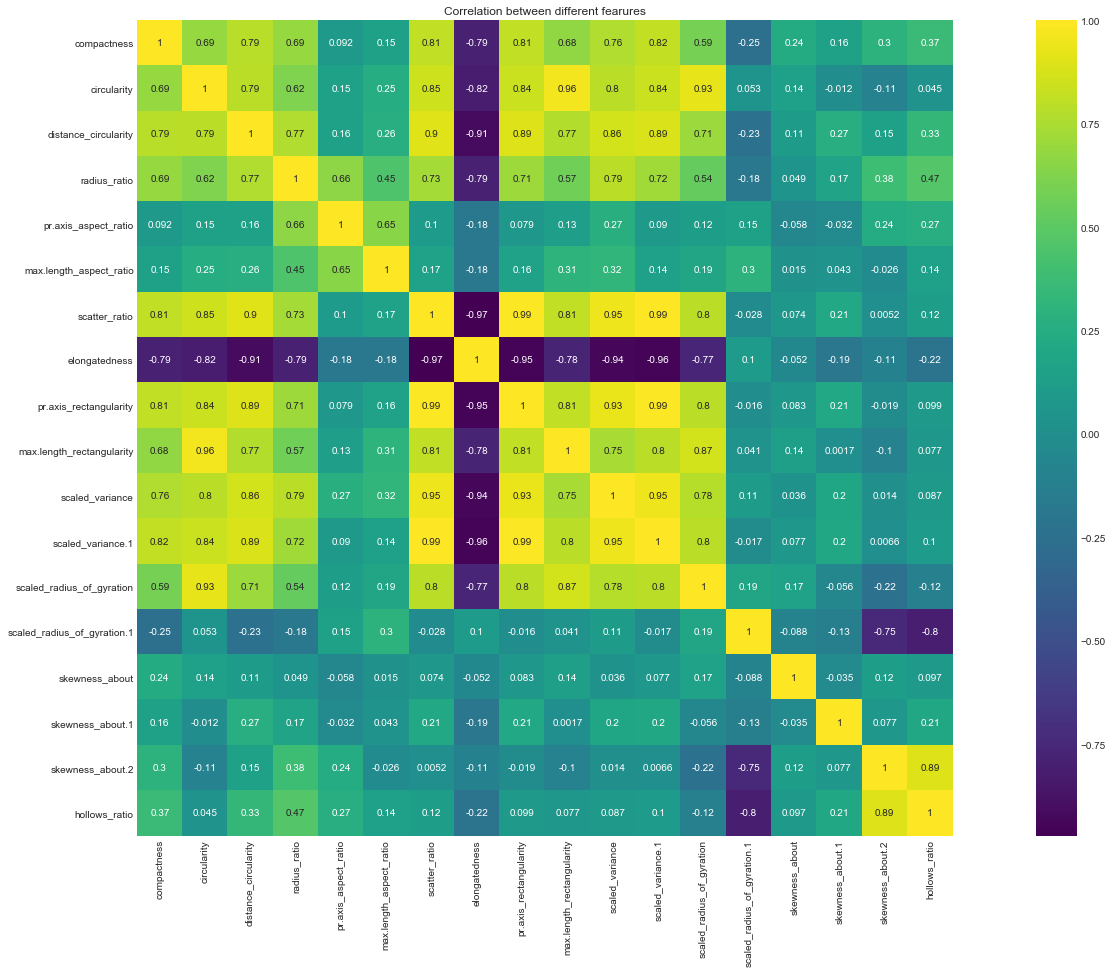

In [142]:
def correlation_heatmap(df_vehicle,l,w):
   
    correlation = df_vehicle.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();
    
# Let's Drop Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA as PCA should only be perfromed on independent attribute
cleandf= df.drop('class', axis=1)
#print("After Dropping: ", cleandf)
correlation_heatmap(cleandf, 30,15)

In [143]:
# there are many variables with very high correlation. 
#Presence of all these variables will impact the performance of any model tried due to multicollinearity. 
#The multicollinearity will introduce biasness in the model as well. 
#However removing so many variables also would not be a great idea as it could lead to loss of information

#The below columns have very high correlation amoung themselves. These columns are our potential target for PCA
#'compactness', 'circularity', 'distance_circularity', 'radius_ratio','scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'

#skewness_about and skewness_about1 does not have much better correlation apart from themselves
#scaled_radius_of_gyration.1 is negatively correlated with hollows_ratio and skewness_about.2.
#elongatedness has most negative corretion with the other columns


In [144]:
# reseting the index of the data as few rows are dropped
df_vehicle = df_vehicle.reset_index(drop=True)

In [145]:

# Segreate the working dataset into high correlative and low correlative values
corr_high = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration']

corr_low = ['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'skewness_about', 'skewness_about.1', 'hollows_ratio', 'class']

In [146]:
# Preparing the features and target variable for modelling
X = df_vehicle.drop('class',axis=1)
y = df_vehicle['class']

In [147]:
# scaling the data
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.144530     0.513520              0.033696      0.297693   
1    -0.347114    -0.630882              0.098221     -0.881410   
2     1.250727     0.840492              1.517783      1.285590   
3    -0.101292    -0.630882             -0.030830     -0.307792   
4     1.619460    -0.004931              1.517783      0.106487   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.925338                 0.884738      -0.218276   
1             -0.766141                 0.396089      -0.618034   
2              0.848746                 0.884738       1.165501   
3              0.310451                 0.396089      -0.771787   
4             -2.022164                -1.069860       2.641529   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.153198               -0.234710                   0.756001   
1       0.541986               -0.629989                  -0.349571   
2      -1.142760                0.951124                   0.686903   
3       0.671582               -0.629989                  -0.349571   
4      -1.920335                2.927516                   1.446984   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.404389          -0.355641                   0.298983   
1        -0.605492          -0.640946                  -0.510474   
2         1.170926           1.134932                   1.419769   
3        -0.940666          -0.763220                  -1.475595   
4         3.081413           3.009794                   2.789618   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.283538       -0.085376          0.365747   
1                     0.052543        0.523160          0.143294   
2                     0.220584        1.537388         -0.412838   
3                    -1.459823       -0.085376         -0.301611   
4                     2.237072       -0.288222         -0.412838   

   skewness_about.2  hollows_ratio  
0         -0.367151       0.135391  
1         -0.036212       0.411955  
2         -0.201681      -0.002892  
3          1.618482       1.518211  
4         -1.359967      -1.800558

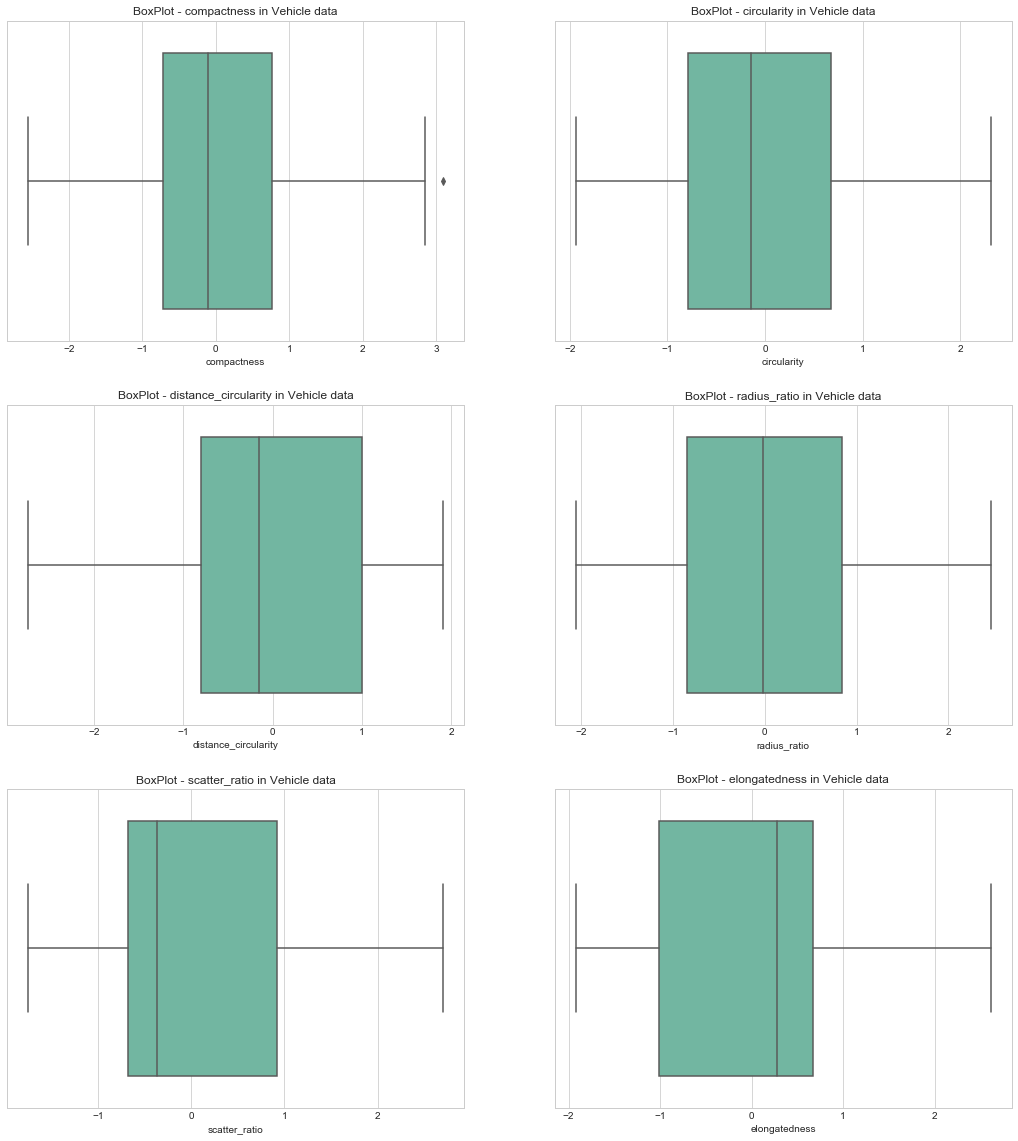

In [148]:
#checking for outliers post scaling 
outlier_detection(corr_high,XScaled)

In [149]:
X_train,X_test,Y_train,Y_test = train_test_split(XScaled,y,test_size=0.3,random_state=10)
target_names = ['bus', 'car', 'van']

In [150]:
# instantiate the classifier object
clf_svc = SVC()

# fit the model on raw data
clf_svc.fit(X_train,Y_train)

# predict the test data
prediction_svc= clf_svc.predict(X_test)

print("\nScore on Training Data",clf_svc.score(X_train, Y_train))
print("\nScore on Test Data",clf_svc.score(X_test,Y_test))
print("\nConfusion Matrix:\n",metrics.confusion_matrix(prediction_svc,Y_test))
print(metrics.classification_report(Y_test, prediction_svc, target_names=target_names))


Score on Training Data 0.9701230228471002

Score on Test Data 0.9713114754098361

Confusion Matrix:
 [[ 56   0   1]
 [  0 121   2]
 [  1   3  60]]
              precision    recall  f1-score   support

         bus       0.98      0.98      0.98        57
         car       0.98      0.98      0.98       124
         van       0.94      0.95      0.94        63

    accuracy                           0.97       244
   macro avg       0.97      0.97      0.97       244
weighted avg       0.97      0.97      0.97       244



In [151]:
# Set the parameters by cross-validation
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250 ,1500]},
              {'kernel': ['poly'], 'degree': [2,3],'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250 ,1500]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.1, 10, 25, 50, 100, 1000,1250,1500]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]



# starting time
start = time.time()

grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, Y_train)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 9.008601188659668


In [152]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [153]:
# Given best kernel is rbf with gamma = 0.01 and C=1000, we may tune further with values closer to these values
param_grid = [{'kernel': ['rbf'], 'gamma': [0.005, 0.008, 0.01, 0.02, 0.03],
                     'C': [500,750 ,1000,1250 ,1500, 1700, 1900]}]

grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, Y_train)

# print best parameter after tuning 
print(grid.best_params_)

{'C': 750, 'gamma': 0.008, 'kernel': 'rbf'}


In [154]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(metrics.classification_report(Y_test, grid_predictions, target_names=target_names))

              precision    recall  f1-score   support

         bus       0.96      0.96      0.96        57
         car       0.98      0.98      0.98       124
         van       0.94      0.94      0.94        63

    accuracy                           0.97       244
   macro avg       0.96      0.96      0.96       244
weighted avg       0.97      0.97      0.97       244



In [155]:
cov_matrix = np.cov(XScaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00123153e+00  6.80730752e-01  7.83720660e-01  7.47068084e-01
   2.01105619e-01  5.18581652e-01  8.06865982e-01 -7.82739812e-01
   8.08995065e-01  6.70841049e-01  7.87084491e-01  8.11746207e-01
   5.76265602e-01 -2.58348336e-01  2.24140915e-01  1.48531674e-01
   2.93081748e-01  3.75866377e-01]
 [ 6.80730752e-01  1.00123153e+00  7.90869688e-01  6.45363556e-01
   2.07596479e-01  5.79288166e-01  8.48949953e-01 -8.19214606e-01
   8.47257352e-01  9.64712740e-01  8.09476454e-01  8.41752774e-01
   9.31678388e-01  7.47923369e-02  1.39835951e-01 -2.68939301e-02
  -1.21541163e-01  4.38609947e-02]
 [ 7.83720660e-01  7.90869688e-01  1.00123153e+00  8.09907257e-01
   2.43765037e-01  6.83657628e-01  9.08451605e-01 -9.09727039e-01
   8.98816619e-01  7.69488318e-01  8.88876131e-01  8.94062301e-01
   7.05369881e-01 -2.28161532e-01  9.77802517e-02  2.56784635e-01
   1.17919283e-01  3.25122610e-01]
 [ 7.47068084e-01  6.45363556e-01  8.09907257e-01  1.00123153e+00
   6.63552488e-

In [156]:
# Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.27061095 -0.09565217  0.04955648  0.13672747 -0.15480519  0.24509315
  -0.23296483 -0.75993235  0.36340108  0.13105738  0.03324683  0.01294693
  -0.00627002  0.14392887  0.09606872  0.00475646  0.01214519  0.0012362 ]
 [-0.28574878  0.13749923  0.20654983 -0.03896523  0.12764172 -0.05821188
   0.38203567 -0.07771262  0.04664767 -0.21749589  0.08164603 -0.14488724
   0.00235888  0.15283103 -0.21579748 -0.10889793  0.33564109  0.64187611]
 [-0.30087845 -0.04050767 -0.06931889  0.10846525  0.0855827  -0.0245092
  -0.16066505  0.30759313  0.24163033  0.1292337   0.78205077  0.22488132
   0.01050081 -0.10610173 -0.0089348   0.02686534  0.1103261  -0.03614862]
 [-0.27286501 -0.20158562 -0.06113439 -0.24682704 -0.12705952 -0.1338213
  -0.15425616  0.06760246  0.17131987 -0.08532179 -0.11445771 -0.31137551
  -0.02654712 -0.01776389 -0.71525678  0.00616254  0.03644127 -0.31171384]
 [-0.09925652 -0.24810537  0.05618881 -0.61946001 -0.10163984 -0.58779079
  -0.10245195 -0.1

In [157]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.56342653  73.04545724  79.82693689  86.29670875  91.0674615
  94.69947274  96.51875825  97.77223259  98.42067604  98.85347739
  99.2035269   99.44145962  99.59678332  99.73855725  99.83761961
  99.92837341  99.98195005 100.        ]


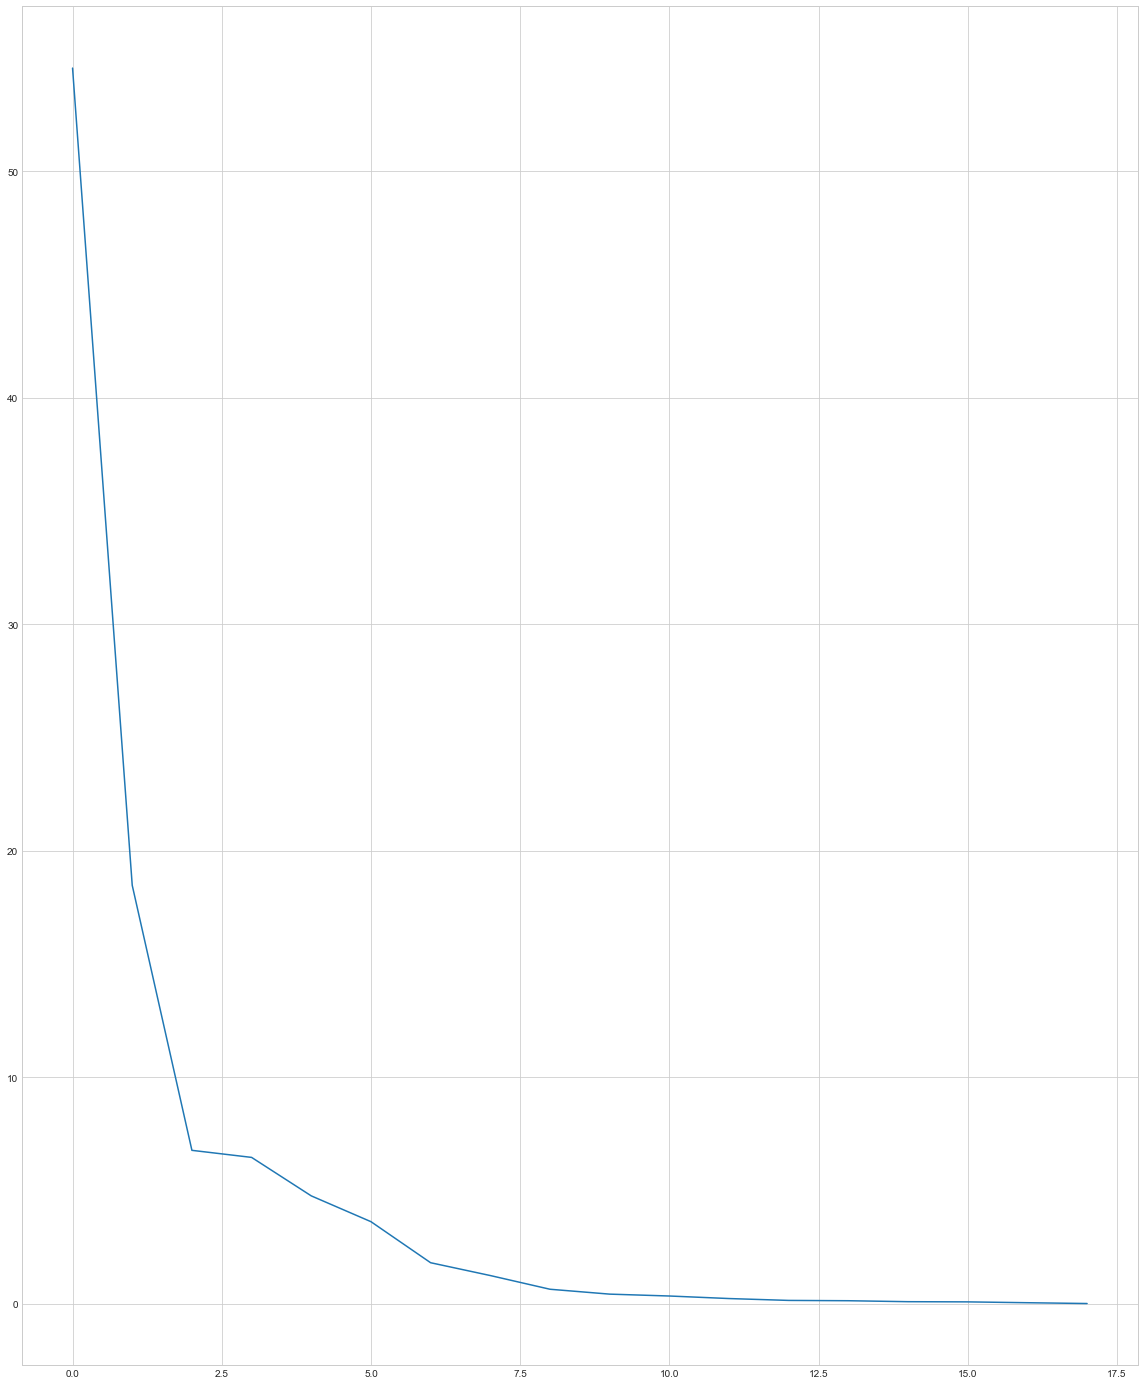

In [158]:

plt.plot(var_exp)

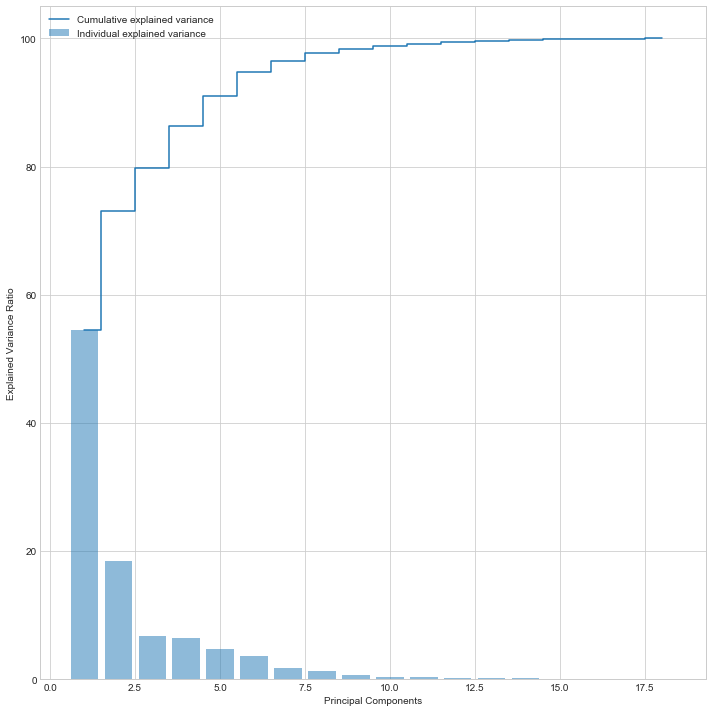

In [159]:
# Ploting 
plt.figure(figsize=(10 , 10))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = .5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [160]:
#Observation :

#95% and more variance of the data is covered by 9 dimensions.
#For the Dimensionality Reduction it clearly states we can go with 9 components.

In [161]:
# import library
from sklearn.decomposition import PCA

# considering only the scalled features
X = XScaled

# considering 9 components
pca = PCA(n_components=9)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [162]:
print('Explained Variance :\n',pca.explained_variance_)

Explained Variance :
 [9.83351212 3.33086253 1.22216962 1.16599312 0.85979305 0.65456715
 0.32787468 0.22590324 0.11686357]


In [163]:
print('Principle Components :\n',pca.components_)

Principle Components :
 [[-0.27061095 -0.28574878 -0.30087845 -0.27286501 -0.09925652 -0.20088875
  -0.30991102  0.30757129 -0.3072649  -0.27582865 -0.30249389 -0.3072982
  -0.26113437  0.04240127 -0.0370068  -0.05531411 -0.03309058 -0.08567402]
 [-0.09565217  0.13749923 -0.04050767 -0.20158562 -0.24810537 -0.07859477
   0.0693232  -0.012397    0.08073738  0.12881491  0.06587468  0.07335593
   0.20738276  0.50671026 -0.03555457 -0.08938436 -0.5067903  -0.50822123]
 [-0.04955648 -0.20654983  0.06931889  0.06113439 -0.05618881 -0.15490586
   0.11293442 -0.10323871  0.10744024 -0.21915158  0.15138279  0.11246893
  -0.21122291  0.07385648 -0.55971507  0.6574741  -0.05745659 -0.04137929]
 [-0.13672747  0.03896523 -0.10846525  0.24682704  0.61946001 -0.30174584
  -0.00245256 -0.07467319 -0.02912621 -0.04175244  0.05616803  0.00298697
   0.087742    0.12221607 -0.44870889 -0.43119236  0.04528491 -0.09501379]
 [ 0.15480519 -0.12764172 -0.0855827   0.12705952  0.10163984 -0.61492942
   0.082022

In [164]:
#transform the raw data which is in 18 dimension into 9 new dimension with pca
df_postPCA = pca.transform(X)

In [165]:
# Now we Split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(df_postPCA, y, test_size = 0.3, random_state = 10)
print('shape of X_train and X_test : {} , {}'.format(X_train.shape,X_test.shape))
target_names = ['bus', 'car', 'van']

shape of X_train and X_test : (569, 9) , (244, 9)


In [166]:
# instantiate the classifier object
clf_svc = SVC()

# fit the model on raw data
clf_svc.fit(X_train,y_train)

# predict the test data
prediction_svc= clf_svc.predict(X_test)

print("\nScore on Training Data",clf_svc.score(X_train, y_train))
print("\nScore on Test Data",clf_svc.score(X_test,y_test))
print("\nConfusion Matrix:\n",metrics.confusion_matrix(prediction_svc,y_test))
print(metrics.classification_report(y_test, prediction_svc, target_names=target_names))


Score on Training Data 0.9666080843585237

Score on Test Data 0.9590163934426229

Confusion Matrix:
 [[ 56   0   2]
 [  0 121   4]
 [  1   3  57]]
              precision    recall  f1-score   support

         bus       0.97      0.98      0.97        57
         car       0.97      0.98      0.97       124
         van       0.93      0.90      0.92        63

    accuracy                           0.96       244
   macro avg       0.96      0.95      0.96       244
weighted avg       0.96      0.96      0.96       244



In [167]:
# GaussianNB 

# instantiate the classifier object
clf_GaussianNB = GaussianNB()

# fit the model on raw data
clf_GaussianNB.fit(X_train, y_train)

# predict the test data
prediction_Gaus= clf_GaussianNB.predict(X_test)

print("\nScore on Training Data",clf_GaussianNB.score(X_train, y_train))
print("\nScore on Test Data",clf_GaussianNB.score(X_test,y_test))
print("\nConfusion Matrix:\n",metrics.confusion_matrix(prediction_Gaus,y_test))
print(metrics.classification_report(y_test, prediction_Gaus, target_names=target_names))


Score on Training Data 0.8875219683655536

Score on Test Data 0.8647540983606558

Confusion Matrix:
 [[ 42   5   1]
 [  5 116   9]
 [ 10   3  53]]
              precision    recall  f1-score   support

         bus       0.88      0.74      0.80        57
         car       0.89      0.94      0.91       124
         van       0.80      0.84      0.82        63

    accuracy                           0.86       244
   macro avg       0.86      0.84      0.85       244
weighted avg       0.87      0.86      0.86       244



In [168]:
# assiging the grid values for GridSearchCV
param_grid = [{'C': [0.01,0.05,0.5,10],  
              'gamma': ['auto'], 
              'kernel': ['rbf']},{'C': [0.01,0.05,0.5,1,10],  
              'gamma': ['auto'], 
              'kernel': ['linear']}]

In [169]:
# instantiate the classifier object
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)

# fit the model on raw data
clf_grid.fit(X_train, y_train)

# cross validation
prediction_grid= clf_svc.predict(X_test)

print("\nScore on Training Data",clf_grid.score(X_train, y_train))
print("\nScore on Test Data", clf_grid.score(X_test,y_test))
print("\nConfusion Matrix:\n",metrics.confusion_matrix(prediction_grid,y_test))
print("\nBest Parameters:\n", clf_grid.best_params_)
print("\nBest Estimators:\n", clf_grid.best_estimator_)
print(metrics.classification_report(y_test, prediction_grid, target_names=target_names))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Score on Training Data 0.9964850615114236

Score on Test Data 0.9754098360655737

Confusion Matrix:
 [[ 56   0   2]
 [  0 121   4]
 [  1   3  57]]

Best Parameters:
 {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Best Estimators:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

         bus       0.97      0.98      0.97        57
         car       0.97      0.98      0.97       124
         van       0.93      0.90      0.92        63

    accuracy                           0.96       244
   macro avg       0.96      0.95      0.96       244
weighted avg       0.96      0.96      0.96       244



[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


In [170]:
#Observation (model with reduced features) :

#SVM classifier without reduced features is slightly better when compared to SVM classifier with reduced features
#Best tuning parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}